<a href="https://colab.research.google.com/github/indahpurwatiiii/SQL-Code/blob/main/da_amazon_book_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keterangan Data

Dataset on Amazon's Top 50 bestselling books from 2009 to 2019. Contains 550 books, data has been categorized into fiction and non-fiction using Goodreads

Beberapa insight yang akan diperoleh dari data ini

1. Penulis dengan Banyak Buku Terlaris
2. Persentase Genre Fiksi dan Nonfiksi
3. Distribusi Harga Berdasarkan Genre
4. Korelasi antara User Rating, Reviews, dan Harga
5. Analisis Popularitas Genre seiring Waktu
6. Buku dengan User Rating Tertinggi
7. Buku dengan Ulasan Terbanyak
8. Analisis Kata Kunci dalam Judul Buku

# Import Modul

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from matplotlib.lines import Line2D
from warnings import filterwarnings
sns.set_style('whitegrid')


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Input Data
The dataset can be accessed from Kaggle: Amazon Top 50 Bestselling Books 2009 - 2019.

In [94]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/bestsellers with categories.xls")

In [44]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


# Analisis

In [11]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


# 1 Penulis Terlaris Tahun 2009 - 2019

In [43]:
top_author=df.groupby('Name')['Name'].agg(['count']).reset_index().sort_values(by='count',ascending=False).head(10)
print(top_author)

                                                  Name  count
191  Publication Manual of the American Psychologic...     10
209                                StrengthsFinder 2.0      9
178                          Oh, the Places You'll Go!      8
310                        The Very Hungry Caterpillar      7
219  The 7 Habits of Highly Effective People: Power...      7
243  The Four Agreements: A Practical Guide to Pers...      6
140  Jesus Calling: Enjoying Peace in His Presence ...      6
281                       The Official SAT Study Guide      5
322                              To Kill a Mockingbird      5
216  The 5 Love Languages: The Secret to Love That ...      5


Buku paling laris dan banyak muncul pada data adalah **"Publication Manual of the American Psychological Association"** dengan total 10 kali muncul pada jangka tahun 2009 hingga 2019.

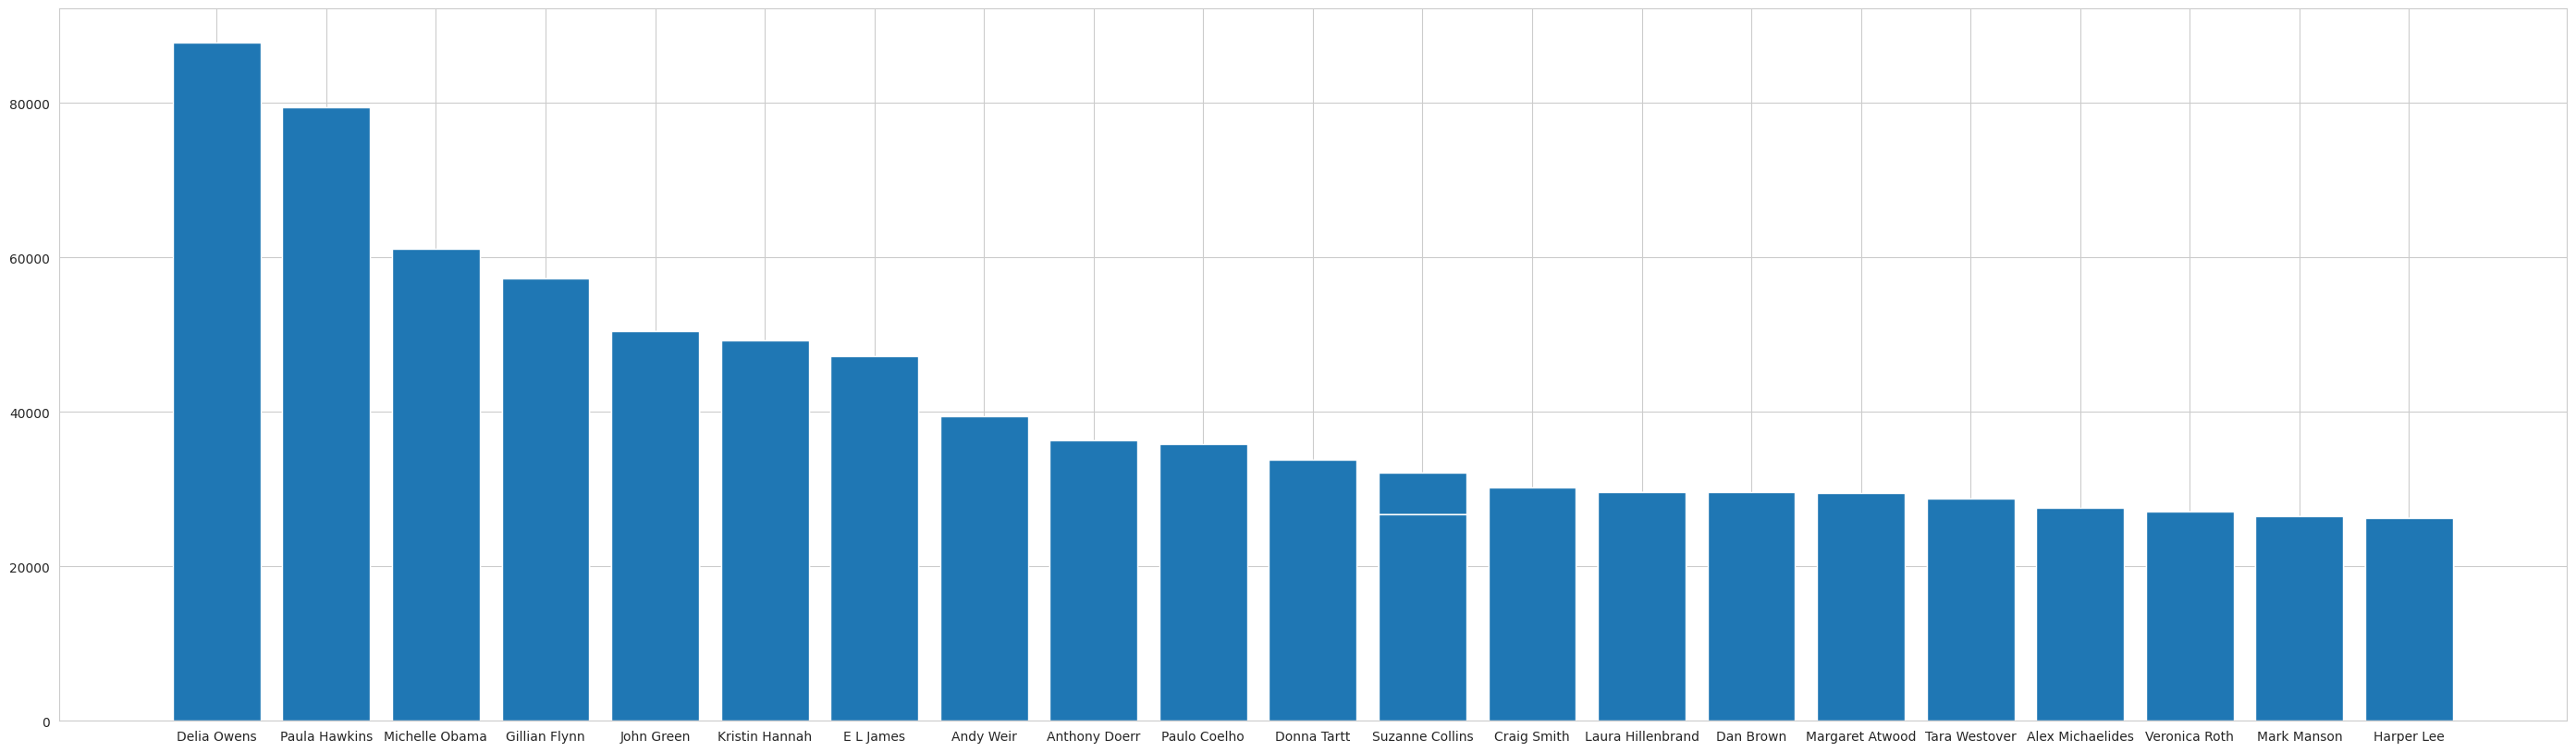

In [69]:
plt.figure(figsize=(35,10))
df_sort=df.sort_values(by=['Reviews'],ascending=False)
x=df_sort[:50]['Author'].values
y=df_sort[:50]['Reviews'].values
plt.bar(x,y)
plt.show()

Penulis dengan Review paling banyak adalah Della Owens.

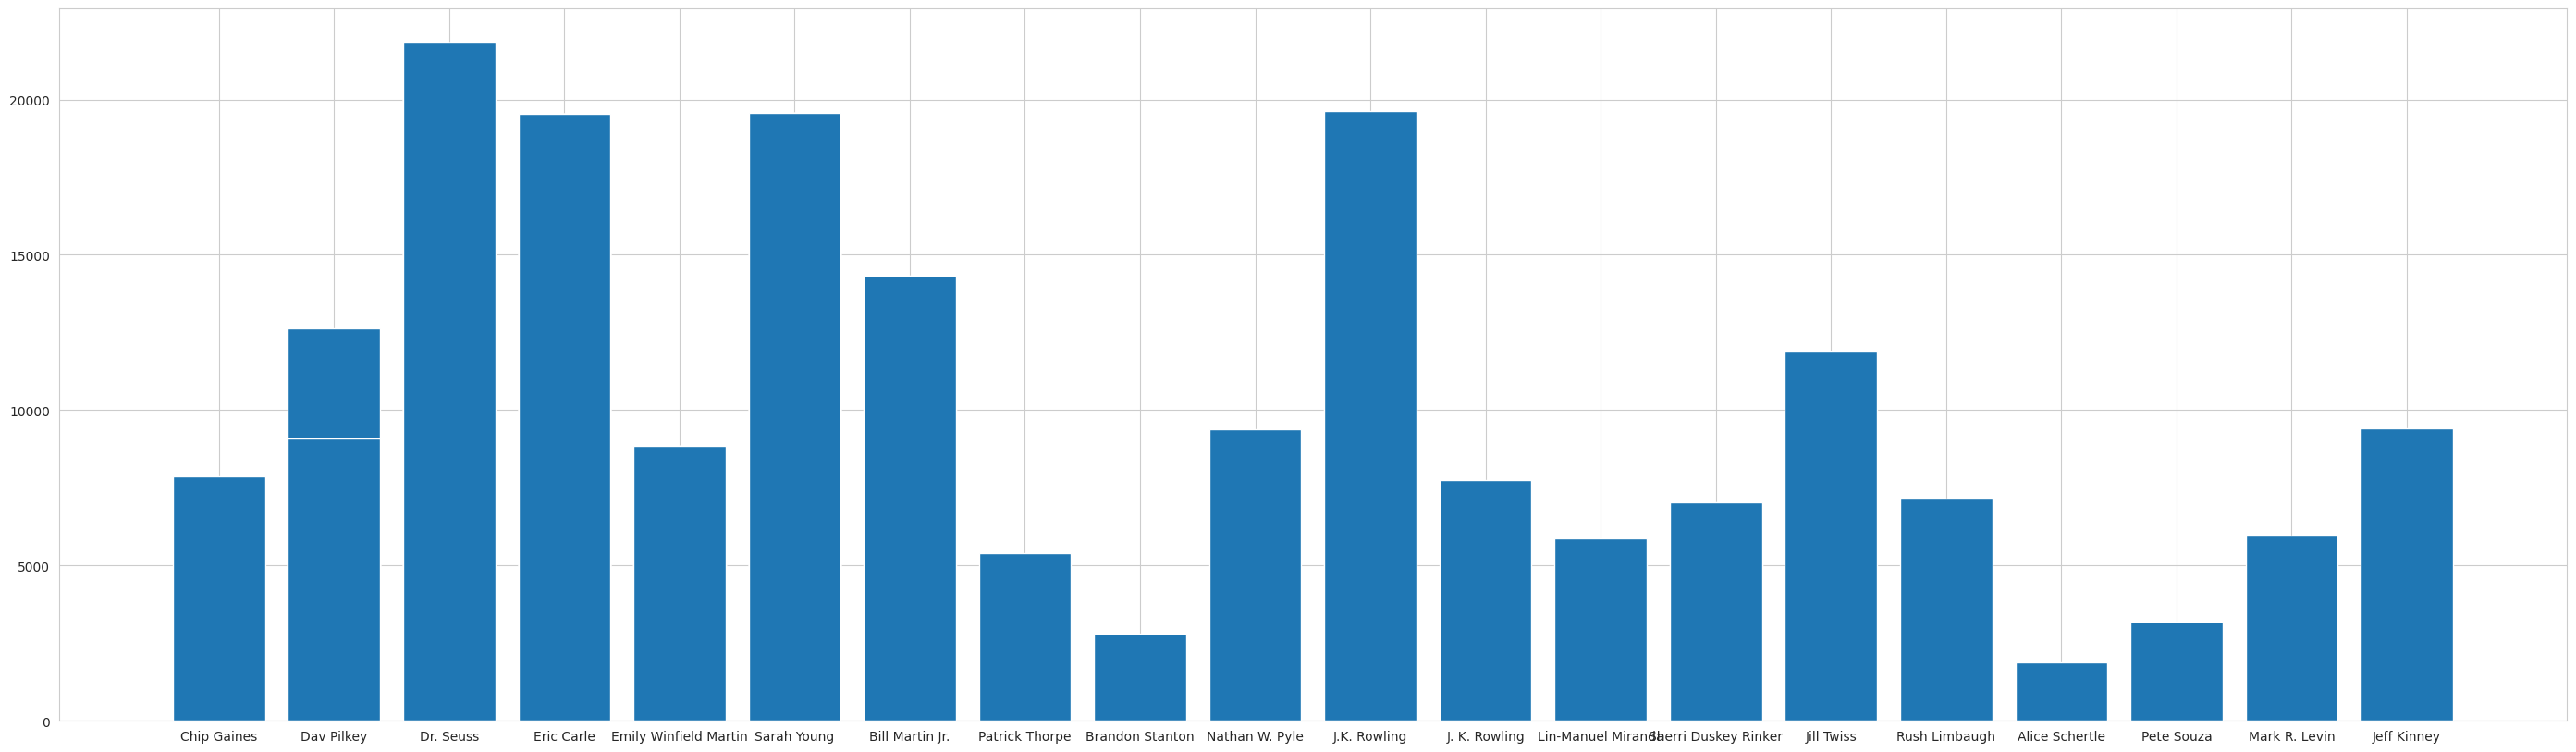

In [92]:
plt.figure(figsize=(35,10))
df_sort=df.sort_values(by=['User Rating'],ascending=False)
x=df_sort[:50]['Author'].values
y=df_sort[:50]['Reviews'].values
plt.bar(x,y)
plt.show()

Penulis dengan Review paling banyak dengan user rating paling tinggi adalah Dr.Seuss dan JK.Rowling.

# 2 Persentase Genre Fiksi dan Nonfiksi

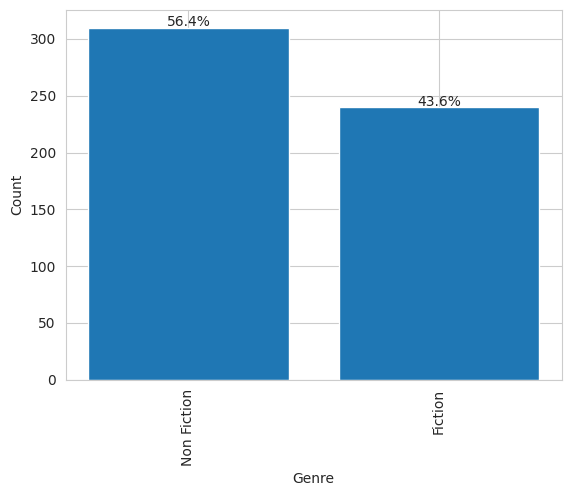

In [67]:
top_genre = df.groupby('Genre')['Genre'].agg(['count']).reset_index().sort_values(by='count', ascending=False).head(10)
total_count = top_genre['count'].sum()
top_genre['percentage'] = (top_genre['count'] / total_count) * 100

# Plotting
plt.bar(top_genre['Genre'], top_genre['count'])

# Menambahkan label persentase
for i, count in enumerate(top_genre['count']):
    percentage = top_genre['percentage'].iloc[i]
    plt.text(i, count + 1, f"{percentage:.1f}%", ha='center')

# Mengatur label sumbu x
plt.xticks(rotation=90)

# Memberikan judul dan label sumbu
plt.xlabel('Genre')
plt.ylabel('Count')

# Menampilkan diagram
plt.show()



In [22]:
top_genre=df.groupby('Genre')['Genre'].agg(['count']).reset_index().sort_values(by='count',ascending=False).head(10)
print(top_genre)

         Genre  count
1  Non Fiction    310
0      Fiction    240


Genre yang paling banyak diminati adalah genre non fiksi sebnayak 310 buah atau 56.4% dari keseluruhan data buku.

# 3 Distribusi Harga

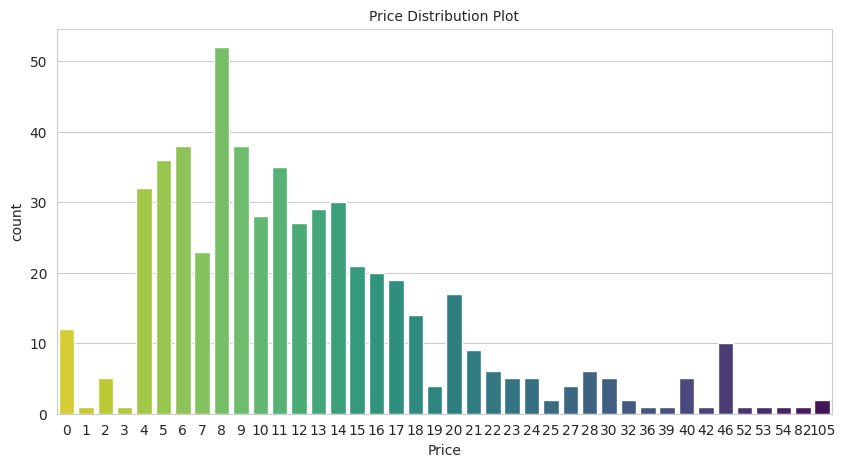

In [12]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['Price'],palette='viridis_r')
plt.title('Price Distribution Plot',fontsize=10)
plt.show()

In [20]:
top_price=df.groupby('Price')['Price'].agg(['count']).reset_index().sort_values(by='count',ascending=False).head(10)
print(top_price)

    Price  count
8       8     52
6       6     38
9       9     38
5       5     36
11     11     35
4       4     32
14     14     30
13     13     29
10     10     28
12     12     27


Harga yang paling banyak dibeli adalah harga buku $8.

## Distribusi Harga berdasarkan Genre

<ipython-input-68-b040b6d2f659>:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Genre', y='Price', data=df, palette='viridis_r')


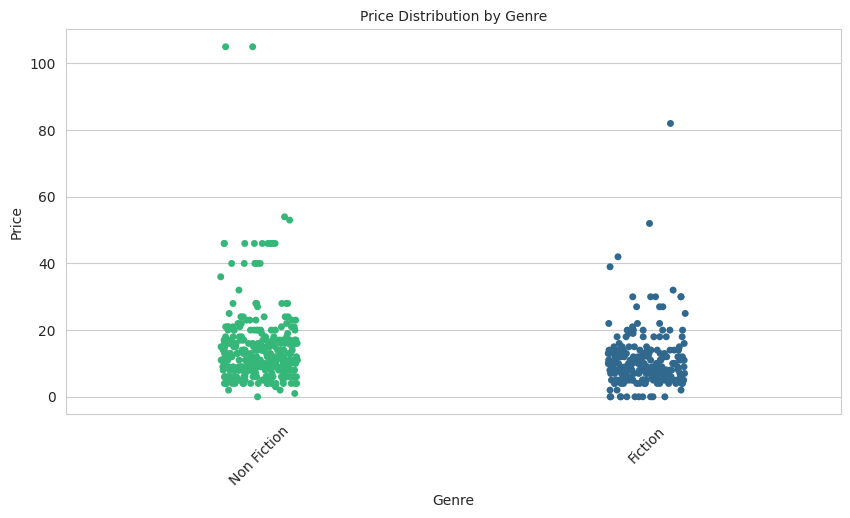

In [68]:
plt.figure(figsize=(10, 5))
sns.stripplot(x='Genre', y='Price', data=df, palette='viridis_r')
plt.title('Price Distribution by Genre', fontsize=10)
plt.xlabel('Genre')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

In [24]:
brand_price = df[["Name","Price"]].groupby(["Name"], as_index = False).mean().sort_values(by = "Price", ascending = False)
brand_price

,Name,Price
56,Diagnostic and Statistical Manual of Mental Di...,105.0
307,The Twilight Saga Collection,82.0
112,Hamilton: The Revolution,54.0
228,The Book of Basketball: The NBA According to T...,53.0
115,Harry Potter Paperback Box Set (Books 1-7),52.0
...,...,...
159,Little Blue Truck,0.0
92,Frozen (Little Golden Book),0.0
139,JOURNEY TO THE ICE P,0.0
235,The Constitution of the United States,0.0


Harga buku paling mahal adalah buku non fiksi, dengan distribusi harga yang paling banyak ada pada harga $ >0 - 20.

# 4 Korelasi antara User Rating, Reviews, dan Harga
Apakah ada korelasi antara user rating, jumlah ulasan, dan harga buku.

              Reviews  User Rating     Price
Reviews      1.000000    -0.001729 -0.109182
User Rating -0.001729     1.000000 -0.133086
Price       -0.109182    -0.133086  1.000000


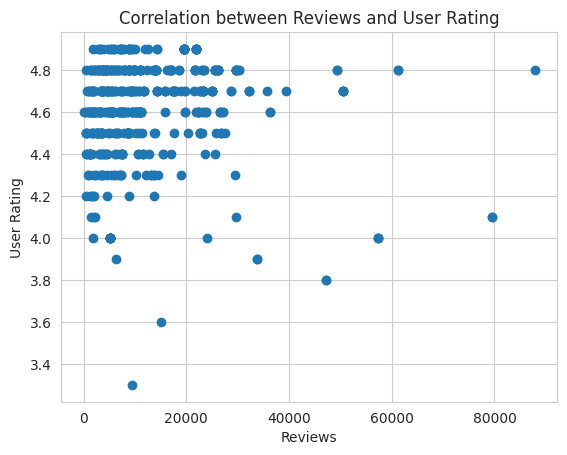

In [84]:
# Menghitung korelasi antara reviews dan user_rating
correlation = df[['Reviews', 'User Rating', 'Price']].corr()

print(correlation)
# Memvisualisasikan korelasi menggunakan scatter plot
plt.scatter(reviews, user_rating)
plt.title('Correlation between Reviews and User Rating')
plt.xlabel('Reviews')
plt.ylabel('User Rating')
plt.show()

- Korelasi antara jumlah ulasan (Reviews) dan user rating: -0.001729
  Nilai korelasi sangat rendah, menunjukkan bahwa tidak ada korelasi yang signifikan antara jumlah ulasan dan user rating. Dengan kata lain, jumlah ulasan tidak memiliki hubungan linier yang kuat dengan peringkat pengguna.

- Korelasi antara jumlah ulasan (Reviews) dan harga (Price): -0.109182
  Nilai korelasi negatif, menunjukkan adanya korelasi lemah antara jumlah ulasan dan harga. Namun, hubungan ini juga tergolong lemah, sehingga dapat dikatakan bahwa jumlah ulasan memiliki pengaruh yang sangat terbatas terhadap harga.

- Korelasi antara user rating dan harga (Price): -0.133086
  Nilai korelasi negatif, menunjukkan adanya korelasi lemah antara user rating dan harga. Hal ini mengindikasikan bahwa ada sedikit hubungan antara peringkat pengguna dengan harga buku, namun pengaruhnya tergolong lemah.

# 5 Analisis Popularitas Genre seiring Waktu
popularitas genre fiksi dan nonfiksi seiring berjalannya waktu. Untuk melihat apakah ada tren dalam preferensi pembaca terkait genre-genre tersebut dari tahun ke tahun.

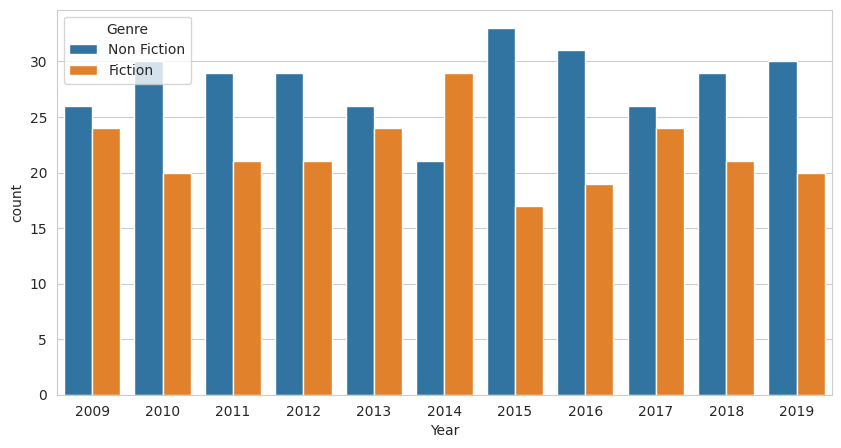

In [114]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['Year'], hue='Genre', data=df)
plt.show()

Genre nonfiksi cenderung lebih banyak diminati, namun pada tahun 2015 genre fiksi lebih populer.

# 6 Buku dengan User Rating Tertinggi

Temukan buku-buku dengan user rating tertinggi dalam dataset. Untuk mengidentifikasi buku-buku yang sangat disukai oleh pembaca berdasarkan peringkat pengguna.


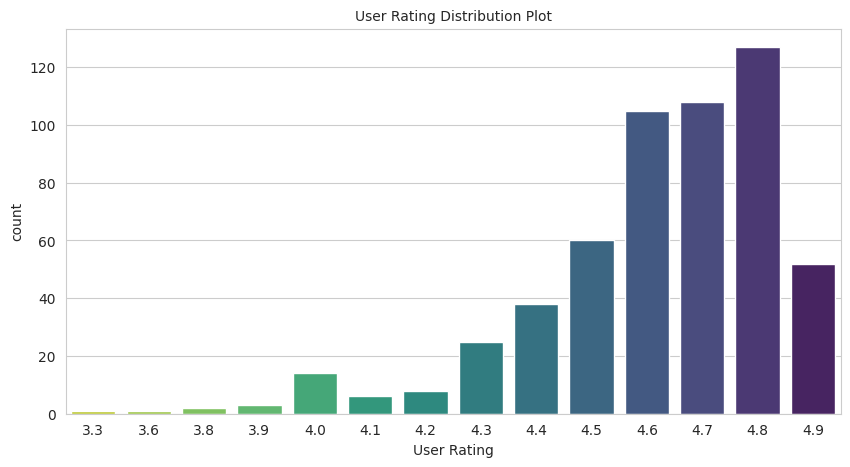

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['User Rating'],palette='viridis_r')
plt.title('User Rating Distribution Plot',fontsize=10)
plt.show()

In [106]:
brand_price = df[["Name","User Rating"]].groupby(["Name"], as_index = False).mean().sort_values(by = "User Rating", ascending = False)
brand_price

,Name,User Rating
112,Hamilton: The Revolution,4.9
197,Rush Revere and the First Patriots: Time-Trave...,4.9
120,Harry Potter and the Sorcerer's Stone: The Ill...,4.9
119,Harry Potter and the Prisoner of Azkaban: The ...,4.9
118,Harry Potter and the Goblet of Fire: The Illus...,4.9
...,...,...
251,The Goldfinch: A Novel (Pulitzer Prize for Fic...,3.9
20,Allegiant,3.9
88,Fifty Shades of Grey: Book One of the Fifty Sh...,3.8
101,Go Set a Watchman: A Novel,3.6


# 7 Buku dengan Ulasan Terbanyak
Temukan buku-buku dengan jumlah ulasan tertinggi dalam dataset. Hal ini dapat memberikan indikasi tentang buku-buku yang paling banyak dibicarakan atau yang paling mempengaruhi pembaca.

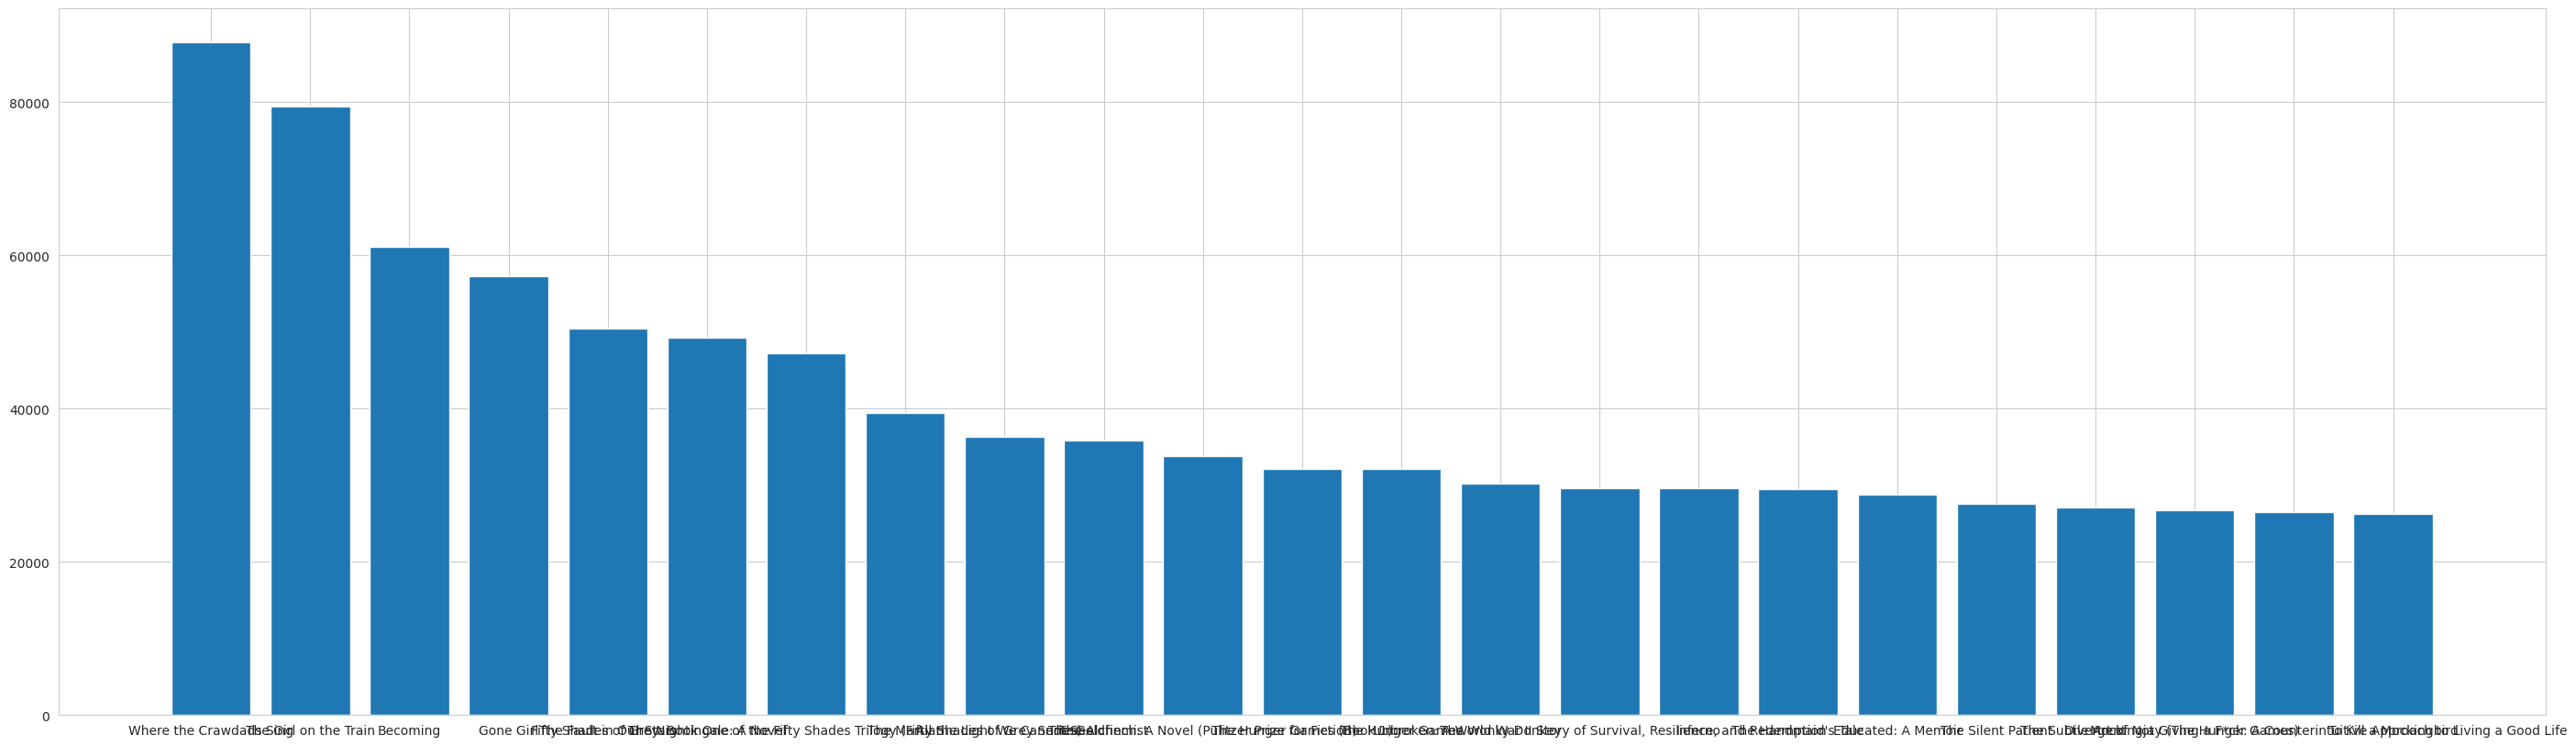

In [91]:
plt.figure(figsize=(35,10))
df_sort=df.sort_values(by=['Reviews'],ascending=False)
x=df_sort[:50]['Name'].values
y=df_sort[:50]['Reviews'].values
plt.bar(x,y)
plt.show()

In [88]:
brand_price = df[["Name","Reviews"]].groupby(["Name"], as_index = False).mean().sort_values(by = "Reviews", ascending = False)
brand_price

,Name,Reviews
342,Where the Crawdads Sing,87841.0
248,The Girl on the Train,79446.0
30,Becoming,61133.0
104,Gone Girl,57271.0
240,The Fault in Our Stars,50482.0
...,...,...
236,The Daily Show with Jon Stewart Presents Earth...,440.0
325,True Compass: A Memoir,438.0
95,George Washington's Sacred Fire,408.0
206,Soul Healing Miracles: Ancient and New Sacred ...,220.0


**Where the Crawdads Sing** adalah buku yang paling banyak dibicarakan berdasarkan banyaknya reviewer yang melakukan review pada buku ini.

# 8 Analisis Kata Kunci dalam Judul Buku
Jika setiap judul buku berisi informasi khusus, untuk mengidentifikasi tren atau tema tertentu dalam judul buku.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


, : 169
( : 137
) : 136
You : 42
Love : 32
Edition : 25
Guide : 24
Novel : 23
Your : 21
Kids : 17
American : 16
Series : 16
Fifty : 16
Shades : 16
Girl : 14


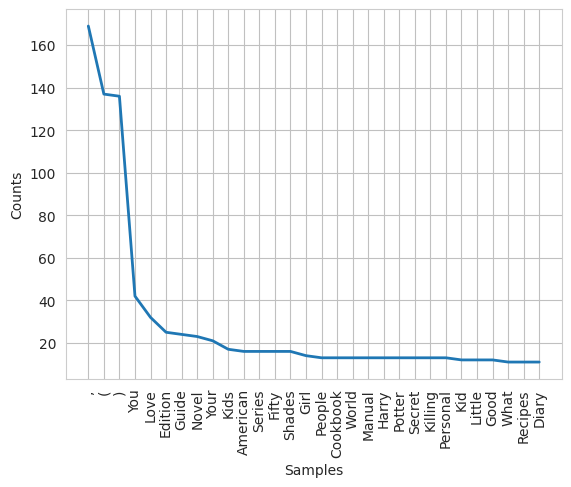

In [105]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import re
nltk.download('punkt')
nltk.download('stopwords')



# Menggabungkan semua judul buku dalam satu teks
all_titles = ' '.join(df['Name'])

# Tokenisasi kata-kata dalam teks
tokens = word_tokenize(all_titles)

# Menghilangkan stopwords (kata-kata umum yang tidak membawa makna)
clean_titles = re.sub(r'[,;(()))]', ' ', all_titles)
filtered_tokens = [word for word in tokens if word.casefold() not in clean_titles]

# Menghitung frekuensi kemunculan kata
freq_dist = FreqDist(filtered_tokens)

# Menampilkan 15 kata kunci paling umum
top_keywords = freq_dist.most_common(15)
for keyword, count in top_keywords:
    print(keyword, ":", count)

# Plotting frekuensi kata kunci
freq_dist.plot(30, cumulative=False)
plt.show()


5 Kata kunci paling banyak muncul pada judul buku yakni **You, Love, Edition, Guide, Novel**.